<a href="https://colab.research.google.com/github/noprisigit/DenseNet169/blob/main/DenseNet169_3_Kelas_20250604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#general
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import itertools
from collections import Counter


#tensorflow
import tensorflow.image as tfi
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Concatenate, ReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax, SGD, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

In [3]:
!unzip '/content/drive/MyDrive/combine-iarc-annocerv-3kelas-resized-augmented.zip'

Streaming output truncated to the last 5000 lines.
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB0_aug7.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB0_aug8.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB0_aug9.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB0_orig.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB2_aug0.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB2_aug1.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB2_aug10.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB2_aug11.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB2_aug12.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augme

In [4]:
CIN_1 = '/content/combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_1'
CIN_2 = '/content/combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2'
CIN_3 = '/content/combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_3'
# NORMAL = '/content/drive/MyDrive/dataset/iarc-annocerv/Normal'
# root_path = '/content/drive/MyDrive/dataset/iarc-annocerv'

# NORMAL = '/content/combine-iarc-annocerv-2kelas-resized-augmented/train_augmented/Normal'
# ABNORMAL = '/content/combine-iarc-annocerv-2kelas-resized-augmented/train_augmented/Abnormal'
test_path = '/content/combine-iarc-annocerv-3kelas-resized-augmented/test'
root_path = '/content/combine-iarc-annocerv-3kelas-resized-augmented'

In [5]:
# classes = sorted(os.listdir(root_path))
classes = ['CIN_1', 'CIN_2', 'CIN_3']
# classes = ['Normal', 'Abnormal']
# print(classes)

In [6]:
# dir_list_cancer = [CIN_1, CIN_2, CIN_3]
# filepaths = []
# labels = []

# for i,j in zip(dir_list_cancer, classes):
#     filelist = os.listdir(i)
#     for name in filelist:
#         filepath = os.path.join(i, name)
#         filepaths.append(filepath)
#         labels.append('Cancer')
# dir_list_cin_1 = [CIN_1]
# filepaths = []
# labels = []

# for i,j in zip(dir_list_cin_1, classes):
#     filelist = os.listdir(i)
#     for name in filelist:
#         filepath = os.path.join(i, name)
#         filepaths.append(filepath)
#         labels.append('CIN_1')

# dir_list_cin_2 = [CIN_2]
# filepaths = []
# labels = []

# for i,j in zip(dir_list_cin_2, classes):
#     filelist = os.listdir(i)
#     for name in filelist:
#         filepath = os.path.join(i, name)
#         filepaths.append(filepath)
#         labels.append('CIN_2')

# dir_list_cin_3 = [CIN_3]
# filepaths = []
# labels = []

# for i,j in zip(dir_list_cin_3, classes):
#     filelist = os.listdir(i)
#     for name in filelist:
#         filepath = os.path.join(i, name)
#         filepaths.append(filepath)
#         labels.append('CIN_3')

# print('filepaths:', len(filepaths), 'labels:', len(labels))

In [7]:
dir_list = [CIN_1, CIN_2, CIN_3]
filepaths = []
labels = []

for i,j in zip(dir_list, classes):
    filelist = os.listdir(i)
    for name in filelist:
        filepath = os.path.join(i, name)
        filepaths.append(filepath)
        labels.append(j)
print('filepaths:', len(filepaths), 'labels:', len(labels))

filepaths: 7861 labels: 7861


In [8]:
file_content=pd.Series(filepaths, name='filepaths')
label_content=pd.Series(labels, name='labels')
df=pd.concat([file_content,label_content], axis=1)
df=pd.DataFrame(np.array(df).reshape(len(filepaths),2), columns = ['filepaths', 'labels'])

In [9]:
df

filepaths labels
0     /content/combine-iarc-annocerv-3kelas-resized-...  CIN_1
1     /content/combine-iarc-annocerv-3kelas-resized-...  CIN_1
2     /content/combine-iarc-annocerv-3kelas-resized-...  CIN_1
3     /content/combine-iarc-annocerv-3kelas-resized-...  CIN_1
4     /content/combine-iarc-annocerv-3kelas-resized-...  CIN_1
...                                                 ...    ...
7856  /content/combine-iarc-annocerv-3kelas-resized-...  CIN_3
7857  /content/combine-iarc-annocerv-3kelas-resized-...  CIN_3
7858  /content/combine-iarc-annocerv-3kelas-resized-...  CIN_3
7859  /content/combine-iarc-annocerv-3kelas-resized-...  CIN_3
7860  /content/combine-iarc-annocerv-3kelas-resized-...  CIN_3

[7861 rows x 2 columns]

In [10]:
df.shape

(7861, 2)

In [11]:
label_counts = df['labels'].value_counts()
print(label_counts.reindex(classes))

labels
CIN_1    2706
CIN_2    2555
CIN_3    2600
Name: count, dtype: int64


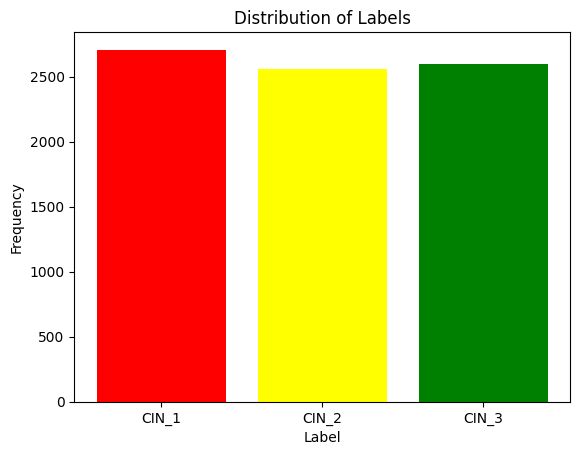

In [12]:
colors = ['red', 'yellow', 'green', 'orange']

label_counts_ordered = label_counts.reindex(classes)

plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

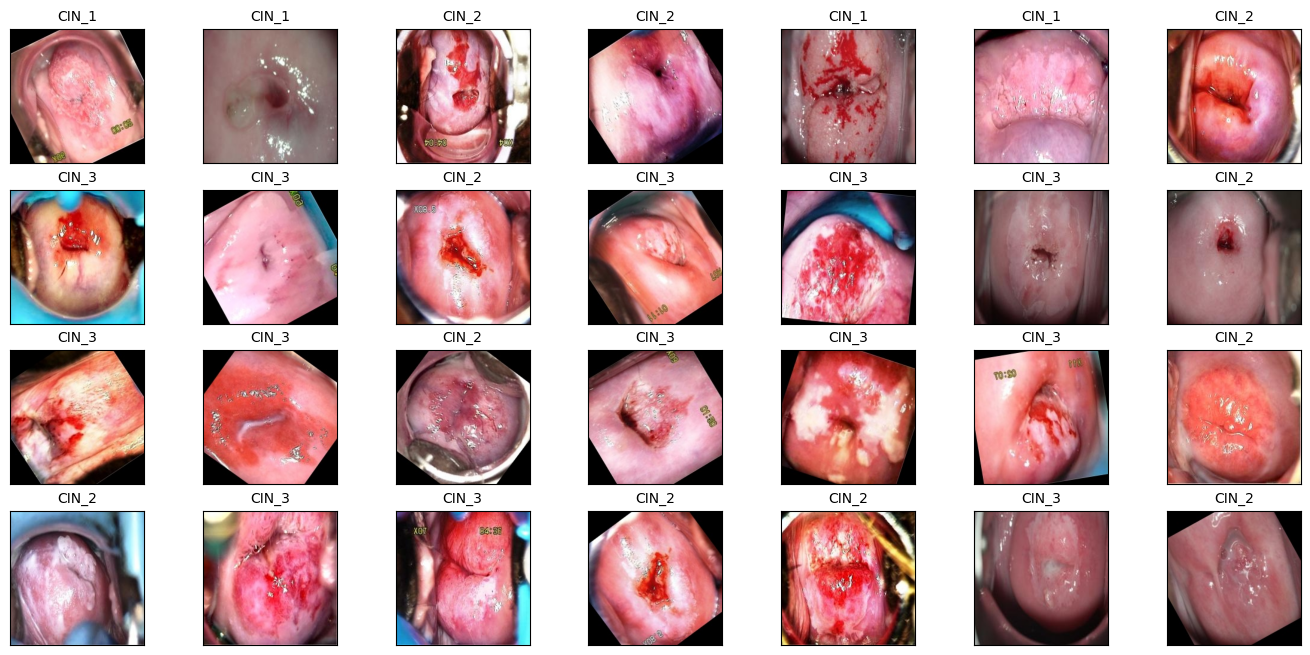

In [13]:
plt.figure(figsize=(17,8))
x1 = 4
x2 = 7
has = x1 * x2

for i in range(has):
    random = np.random.randint(1,len(df))
    plt.subplot(x1,x2,i+1)
    image = cv2.imread(df.loc[random,"filepaths"])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(df.loc[random, "labels"], size = 10)
    plt.xticks([])
    plt.yticks([])

In [14]:
train, valid = train_test_split(df, train_size=0.9, shuffle=True, random_state=1)

In [15]:
train.shape, valid.shape

((7074, 2), (787, 2))

In [16]:
img_size = (150, 150)
batch_size = 32

In [17]:
tr_gen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=90,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest',
    # preprocessing_function=image_CALHE
)

val_gen = ImageDataGenerator(
    rescale= 1./255,
    # preprocessing_function=image_CALHE
)


train_gen = tr_gen.flow_from_dataframe(df , x_col = 'filepaths' , y_col = 'labels' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size = batch_size)

valid_gen = tr_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'labels' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = val_gen.flow_from_directory(
    directory=test_path,  # ganti dengan path folder test kamu
    target_size=img_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
    batch_size=batch_size
)


Found 7861 validated image filenames belonging to 3 classes.
Found 787 validated image filenames belonging to 3 classes.
Found 112 images belonging to 3 classes.


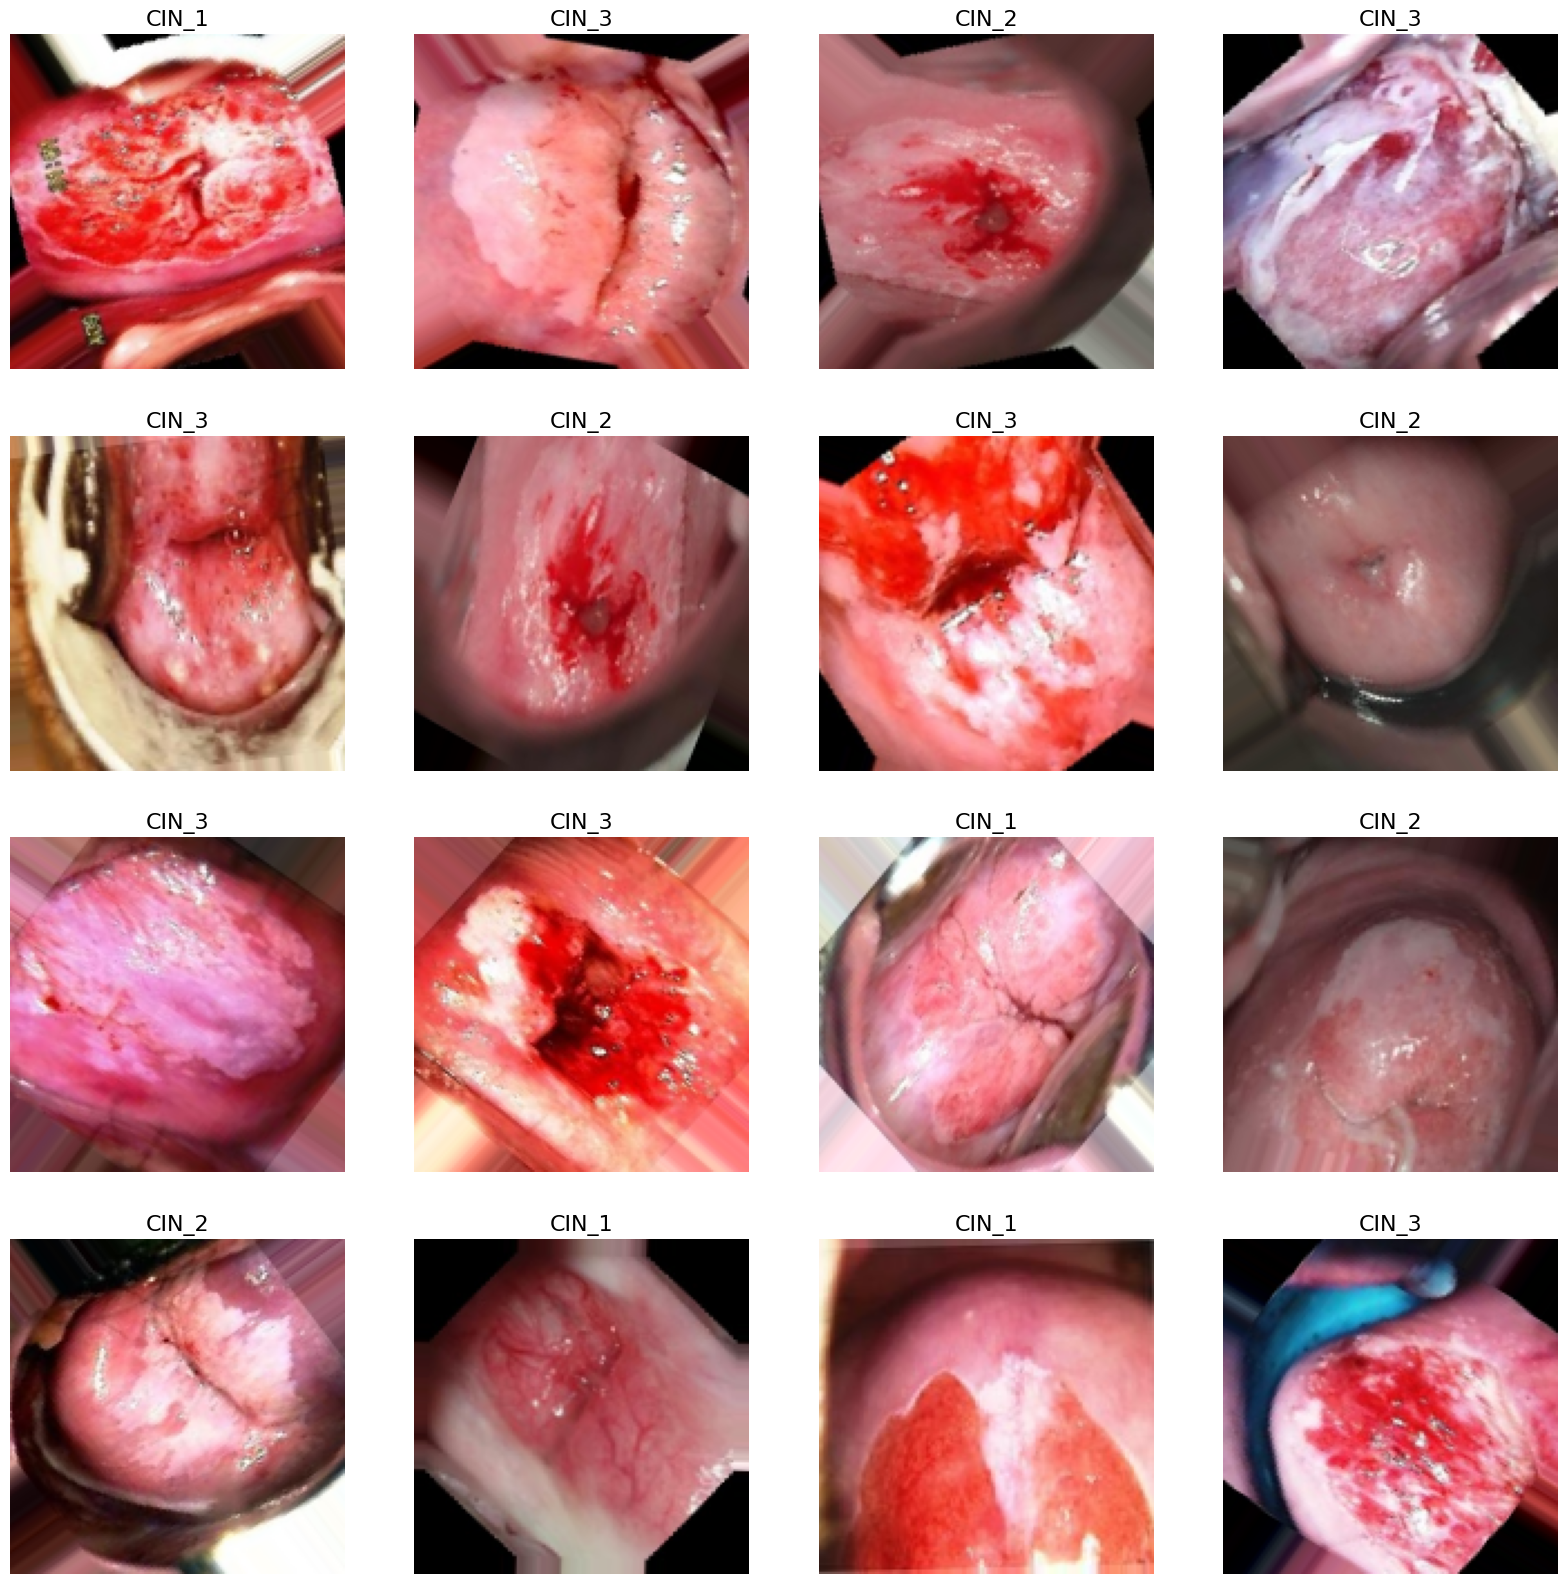

In [18]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)
plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] # / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'black' , fontsize= 16)
    plt.axis('off')
plt.show();

In [19]:
INPUT_SHAPE = (img_size[0] , img_size[1] , 3)
NUM_CLASSES = len(classes)
print(INPUT_SHAPE)

(150, 150, 3)


In [20]:
input_tensor = keras.Input(shape=INPUT_SHAPE)
resnet_base = tf.keras.applications.DenseNet169(weights='imagenet', include_top=False, input_tensor=input_tensor)

for layer in resnet_base.layers:
    layer.trainable = False

resnet_output = GlobalAveragePooling2D()(resnet_base.output)
x = Flatten()(resnet_output)
x = Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

optimizer = Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

model.summary()

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 38, 38,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 38, 38,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 38, 38,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 38, 38,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 38, 38,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 38, 38,    │     12,288 │ conv2_block2_0_r

 Total params: 16,058,947 (61.26 MB)

 Trainable params: 3,416,067 (13.03 MB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

# model_name = "cervicalModel.weights.keras"
# checkpoint = ModelCheckpoint(model_name, monitor='val_loss', verbose=1,save_best_only=True, mode= 'min')
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose= 1, mode='min', factor= 0.2, min_lr = 1e-5)

earlystopping = EarlyStopping(monitor='val_loss', patience = 3, verbose=1, mode='min', restore_best_weights= True)

In [22]:
class_labels = train_gen.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_labels
)

class_weight_dict = dict(zip(np.unique(class_labels), class_weights))
print("Class weights:", class_weight_dict)

epochs = 100

history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    # callbacks=[earlystopping],
    validation_data=valid_gen,
    class_weight=class_weight_dict
)

Class weights: {np.int64(0): np.float64(0.9683419561468342), np.int64(1): np.float64(1.0255707762557078), np.int64(2): np.float64(1.0078205128205129)}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 171s 515ms/step - accuracy: 0.4398 - auc: 0.6231 - loss: 1.4506 - val_accuracy: 0.7128 - val_auc: 0.8795 - val_loss: 0.8001
Epoch 2/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 71s 287ms/step - accuracy: 0.6433 - auc: 0.8245 - loss: 0.8967 - val_accuracy: 0.8005 - val_auc: 0.9247 - val_loss: 0.6741
Epoch 3/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 70s 285ms/step - accuracy: 0.7215 - auc: 0.8890 - loss: 0.7373 - val_accuracy: 0.8463 - val_auc: 0.9607 - val_loss: 0.5418
Epoch 4/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 70s 284ms/step - accuracy: 0.7707 - auc: 0.9213 - loss: 0.6405 - val_accuracy: 0.8831 - val_auc: 0.9687 - val_loss: 0.4844
Epoch 5/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 73s 298ms/step - accuracy: 0.8206 - auc: 0.9445 - loss: 0.5598 - val_accuracy: 0.8780 - val_auc: 0.9707 - val_loss: 0.4651
Epoch 6/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 70s 286ms/step - accuracy: 0.8380 - auc: 0.9582 - loss: 0.5035 - val_accuracy: 0.9060 - val_auc: 0.9801 - val_loss: 0.4015
Epoch 7/100
246

In [23]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss + 1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

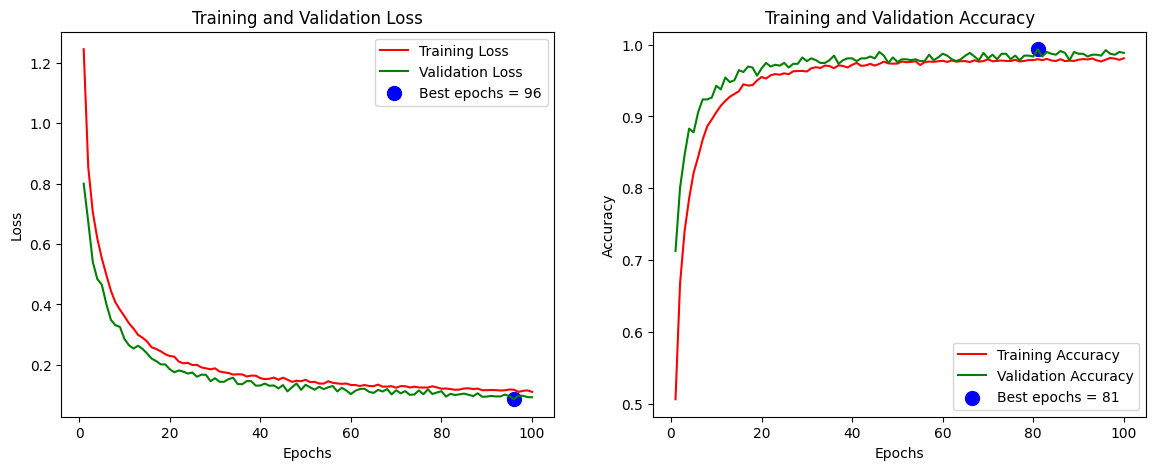

In [24]:
plt.figure(figsize= (14,5))

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 100 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 100 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [25]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.9867 - auc: 0.9998 - loss: 0.0919
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.9897 - auc: 0.9997 - loss: 0.0922
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4564 - auc: 0.6097 - loss: 2.6954 
Train Loss:  0.09419078379869461
Train Accuracy:  0.986328125
--------------------
Validation Loss:  0.09050136059522629
Validation Accuracy:  0.990234375
--------------------
Test Loss:  2.8041017055511475
Test Accuracy:  0.4375


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [26]:
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 6s/step


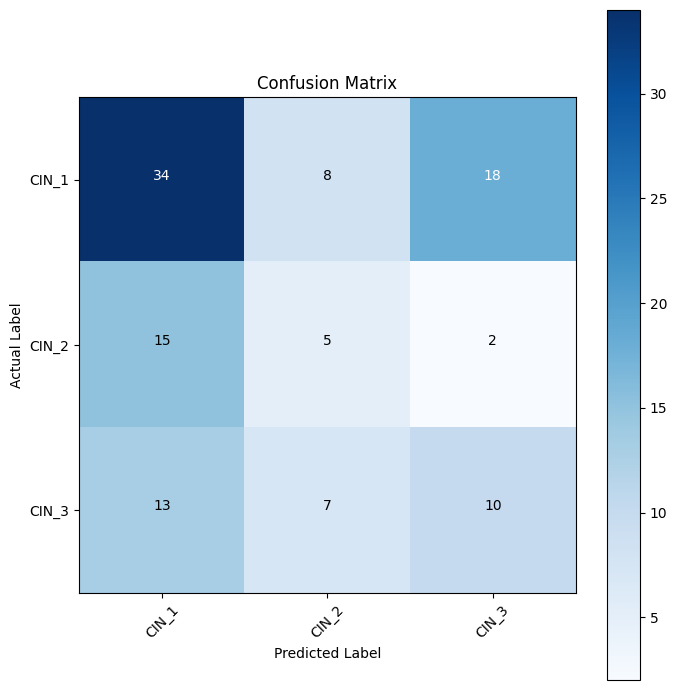

In [27]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (7, 7))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.show()

In [28]:
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

       CIN_1       0.55      0.57      0.56        60
       CIN_2       0.25      0.23      0.24        22
       CIN_3       0.33      0.33      0.33        30

    accuracy                           0.44       112
   macro avg       0.38      0.38      0.38       112
weighted avg       0.43      0.44      0.43       112



## Grad-CAM

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tqdm import tqdm

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap + tf.keras.backend.epsilon())
    return heatmap.numpy()

def overlay_heatmap_on_image(img_array, heatmap, alpha=0.4):
    img = np.uint8(255 * img_array)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_uint8 = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    superimposed_img = heatmap_color * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    return superimposed_img

def display_gradcam_from_generator(test_gen, model, last_conv_layer_name, num_images=5):
    test_gen.reset()
    for i in tqdm(range(num_images)):
        # Changed from test_gen.next() to next(test_gen)
        img_batch, label_batch = next(test_gen)
        img_array = img_batch[0]
        img_input = np.expand_dims(img_array, axis=0)

        heatmap = make_gradcam_heatmap(img_input, model, last_conv_layer_name)
        overlay_img = overlay_heatmap_on_image(img_array, heatmap)

        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(img_array)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(overlay_img)
        plt.title("Grad-CAM")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

In [30]:
last_conv_layer_name = "block5_conv3"  # Ganti sesuai layer konvolusi akhir model Anda
display_gradcam_from_generator(test_gen, model, last_conv_layer_name, num_images=20)

  0%|          | 0/20 [00:00<?, ?it/s]


ValueError: No such layer: block5_conv3. Existing layers are: ['input_layer', 'zero_padding2d', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'zero_padding2d_1', 'pool1', 'conv2_block1_0_bn', 'conv2_block1_0_relu', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_concat', 'conv2_block2_0_bn', 'conv2_block2_0_relu', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_concat', 'conv2_block3_0_bn', 'conv2_block3_0_relu', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_concat', 'conv2_block4_0_bn', 'conv2_block4_0_relu', 'conv2_block4_1_conv', 'conv2_block4_1_bn', 'conv2_block4_1_relu', 'conv2_block4_2_conv', 'conv2_block4_concat', 'conv2_block5_0_bn', 'conv2_block5_0_relu', 'conv2_block5_1_conv', 'conv2_block5_1_bn', 'conv2_block5_1_relu', 'conv2_block5_2_conv', 'conv2_block5_concat', 'conv2_block6_0_bn', 'conv2_block6_0_relu', 'conv2_block6_1_conv', 'conv2_block6_1_bn', 'conv2_block6_1_relu', 'conv2_block6_2_conv', 'conv2_block6_concat', 'pool2_bn', 'pool2_relu', 'pool2_conv', 'pool2_pool', 'conv3_block1_0_bn', 'conv3_block1_0_relu', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_concat', 'conv3_block2_0_bn', 'conv3_block2_0_relu', 'conv3_block2_1_conv', 'conv3_block2_1_bn', 'conv3_block2_1_relu', 'conv3_block2_2_conv', 'conv3_block2_concat', 'conv3_block3_0_bn', 'conv3_block3_0_relu', 'conv3_block3_1_conv', 'conv3_block3_1_bn', 'conv3_block3_1_relu', 'conv3_block3_2_conv', 'conv3_block3_concat', 'conv3_block4_0_bn', 'conv3_block4_0_relu', 'conv3_block4_1_conv', 'conv3_block4_1_bn', 'conv3_block4_1_relu', 'conv3_block4_2_conv', 'conv3_block4_concat', 'conv3_block5_0_bn', 'conv3_block5_0_relu', 'conv3_block5_1_conv', 'conv3_block5_1_bn', 'conv3_block5_1_relu', 'conv3_block5_2_conv', 'conv3_block5_concat', 'conv3_block6_0_bn', 'conv3_block6_0_relu', 'conv3_block6_1_conv', 'conv3_block6_1_bn', 'conv3_block6_1_relu', 'conv3_block6_2_conv', 'conv3_block6_concat', 'conv3_block7_0_bn', 'conv3_block7_0_relu', 'conv3_block7_1_conv', 'conv3_block7_1_bn', 'conv3_block7_1_relu', 'conv3_block7_2_conv', 'conv3_block7_concat', 'conv3_block8_0_bn', 'conv3_block8_0_relu', 'conv3_block8_1_conv', 'conv3_block8_1_bn', 'conv3_block8_1_relu', 'conv3_block8_2_conv', 'conv3_block8_concat', 'conv3_block9_0_bn', 'conv3_block9_0_relu', 'conv3_block9_1_conv', 'conv3_block9_1_bn', 'conv3_block9_1_relu', 'conv3_block9_2_conv', 'conv3_block9_concat', 'conv3_block10_0_bn', 'conv3_block10_0_relu', 'conv3_block10_1_conv', 'conv3_block10_1_bn', 'conv3_block10_1_relu', 'conv3_block10_2_conv', 'conv3_block10_concat', 'conv3_block11_0_bn', 'conv3_block11_0_relu', 'conv3_block11_1_conv', 'conv3_block11_1_bn', 'conv3_block11_1_relu', 'conv3_block11_2_conv', 'conv3_block11_concat', 'conv3_block12_0_bn', 'conv3_block12_0_relu', 'conv3_block12_1_conv', 'conv3_block12_1_bn', 'conv3_block12_1_relu', 'conv3_block12_2_conv', 'conv3_block12_concat', 'pool3_bn', 'pool3_relu', 'pool3_conv', 'pool3_pool', 'conv4_block1_0_bn', 'conv4_block1_0_relu', 'conv4_block1_1_conv', 'conv4_block1_1_bn', 'conv4_block1_1_relu', 'conv4_block1_2_conv', 'conv4_block1_concat', 'conv4_block2_0_bn', 'conv4_block2_0_relu', 'conv4_block2_1_conv', 'conv4_block2_1_bn', 'conv4_block2_1_relu', 'conv4_block2_2_conv', 'conv4_block2_concat', 'conv4_block3_0_bn', 'conv4_block3_0_relu', 'conv4_block3_1_conv', 'conv4_block3_1_bn', 'conv4_block3_1_relu', 'conv4_block3_2_conv', 'conv4_block3_concat', 'conv4_block4_0_bn', 'conv4_block4_0_relu', 'conv4_block4_1_conv', 'conv4_block4_1_bn', 'conv4_block4_1_relu', 'conv4_block4_2_conv', 'conv4_block4_concat', 'conv4_block5_0_bn', 'conv4_block5_0_relu', 'conv4_block5_1_conv', 'conv4_block5_1_bn', 'conv4_block5_1_relu', 'conv4_block5_2_conv', 'conv4_block5_concat', 'conv4_block6_0_bn', 'conv4_block6_0_relu', 'conv4_block6_1_conv', 'conv4_block6_1_bn', 'conv4_block6_1_relu', 'conv4_block6_2_conv', 'conv4_block6_concat', 'conv4_block7_0_bn', 'conv4_block7_0_relu', 'conv4_block7_1_conv', 'conv4_block7_1_bn', 'conv4_block7_1_relu', 'conv4_block7_2_conv', 'conv4_block7_concat', 'conv4_block8_0_bn', 'conv4_block8_0_relu', 'conv4_block8_1_conv', 'conv4_block8_1_bn', 'conv4_block8_1_relu', 'conv4_block8_2_conv', 'conv4_block8_concat', 'conv4_block9_0_bn', 'conv4_block9_0_relu', 'conv4_block9_1_conv', 'conv4_block9_1_bn', 'conv4_block9_1_relu', 'conv4_block9_2_conv', 'conv4_block9_concat', 'conv4_block10_0_bn', 'conv4_block10_0_relu', 'conv4_block10_1_conv', 'conv4_block10_1_bn', 'conv4_block10_1_relu', 'conv4_block10_2_conv', 'conv4_block10_concat', 'conv4_block11_0_bn', 'conv4_block11_0_relu', 'conv4_block11_1_conv', 'conv4_block11_1_bn', 'conv4_block11_1_relu', 'conv4_block11_2_conv', 'conv4_block11_concat', 'conv4_block12_0_bn', 'conv4_block12_0_relu', 'conv4_block12_1_conv', 'conv4_block12_1_bn', 'conv4_block12_1_relu', 'conv4_block12_2_conv', 'conv4_block12_concat', 'conv4_block13_0_bn', 'conv4_block13_0_relu', 'conv4_block13_1_conv', 'conv4_block13_1_bn', 'conv4_block13_1_relu', 'conv4_block13_2_conv', 'conv4_block13_concat', 'conv4_block14_0_bn', 'conv4_block14_0_relu', 'conv4_block14_1_conv', 'conv4_block14_1_bn', 'conv4_block14_1_relu', 'conv4_block14_2_conv', 'conv4_block14_concat', 'conv4_block15_0_bn', 'conv4_block15_0_relu', 'conv4_block15_1_conv', 'conv4_block15_1_bn', 'conv4_block15_1_relu', 'conv4_block15_2_conv', 'conv4_block15_concat', 'conv4_block16_0_bn', 'conv4_block16_0_relu', 'conv4_block16_1_conv', 'conv4_block16_1_bn', 'conv4_block16_1_relu', 'conv4_block16_2_conv', 'conv4_block16_concat', 'conv4_block17_0_bn', 'conv4_block17_0_relu', 'conv4_block17_1_conv', 'conv4_block17_1_bn', 'conv4_block17_1_relu', 'conv4_block17_2_conv', 'conv4_block17_concat', 'conv4_block18_0_bn', 'conv4_block18_0_relu', 'conv4_block18_1_conv', 'conv4_block18_1_bn', 'conv4_block18_1_relu', 'conv4_block18_2_conv', 'conv4_block18_concat', 'conv4_block19_0_bn', 'conv4_block19_0_relu', 'conv4_block19_1_conv', 'conv4_block19_1_bn', 'conv4_block19_1_relu', 'conv4_block19_2_conv', 'conv4_block19_concat', 'conv4_block20_0_bn', 'conv4_block20_0_relu', 'conv4_block20_1_conv', 'conv4_block20_1_bn', 'conv4_block20_1_relu', 'conv4_block20_2_conv', 'conv4_block20_concat', 'conv4_block21_0_bn', 'conv4_block21_0_relu', 'conv4_block21_1_conv', 'conv4_block21_1_bn', 'conv4_block21_1_relu', 'conv4_block21_2_conv', 'conv4_block21_concat', 'conv4_block22_0_bn', 'conv4_block22_0_relu', 'conv4_block22_1_conv', 'conv4_block22_1_bn', 'conv4_block22_1_relu', 'conv4_block22_2_conv', 'conv4_block22_concat', 'conv4_block23_0_bn', 'conv4_block23_0_relu', 'conv4_block23_1_conv', 'conv4_block23_1_bn', 'conv4_block23_1_relu', 'conv4_block23_2_conv', 'conv4_block23_concat', 'conv4_block24_0_bn', 'conv4_block24_0_relu', 'conv4_block24_1_conv', 'conv4_block24_1_bn', 'conv4_block24_1_relu', 'conv4_block24_2_conv', 'conv4_block24_concat', 'conv4_block25_0_bn', 'conv4_block25_0_relu', 'conv4_block25_1_conv', 'conv4_block25_1_bn', 'conv4_block25_1_relu', 'conv4_block25_2_conv', 'conv4_block25_concat', 'conv4_block26_0_bn', 'conv4_block26_0_relu', 'conv4_block26_1_conv', 'conv4_block26_1_bn', 'conv4_block26_1_relu', 'conv4_block26_2_conv', 'conv4_block26_concat', 'conv4_block27_0_bn', 'conv4_block27_0_relu', 'conv4_block27_1_conv', 'conv4_block27_1_bn', 'conv4_block27_1_relu', 'conv4_block27_2_conv', 'conv4_block27_concat', 'conv4_block28_0_bn', 'conv4_block28_0_relu', 'conv4_block28_1_conv', 'conv4_block28_1_bn', 'conv4_block28_1_relu', 'conv4_block28_2_conv', 'conv4_block28_concat', 'conv4_block29_0_bn', 'conv4_block29_0_relu', 'conv4_block29_1_conv', 'conv4_block29_1_bn', 'conv4_block29_1_relu', 'conv4_block29_2_conv', 'conv4_block29_concat', 'conv4_block30_0_bn', 'conv4_block30_0_relu', 'conv4_block30_1_conv', 'conv4_block30_1_bn', 'conv4_block30_1_relu', 'conv4_block30_2_conv', 'conv4_block30_concat', 'conv4_block31_0_bn', 'conv4_block31_0_relu', 'conv4_block31_1_conv', 'conv4_block31_1_bn', 'conv4_block31_1_relu', 'conv4_block31_2_conv', 'conv4_block31_concat', 'conv4_block32_0_bn', 'conv4_block32_0_relu', 'conv4_block32_1_conv', 'conv4_block32_1_bn', 'conv4_block32_1_relu', 'conv4_block32_2_conv', 'conv4_block32_concat', 'pool4_bn', 'pool4_relu', 'pool4_conv', 'pool4_pool', 'conv5_block1_0_bn', 'conv5_block1_0_relu', 'conv5_block1_1_conv', 'conv5_block1_1_bn', 'conv5_block1_1_relu', 'conv5_block1_2_conv', 'conv5_block1_concat', 'conv5_block2_0_bn', 'conv5_block2_0_relu', 'conv5_block2_1_conv', 'conv5_block2_1_bn', 'conv5_block2_1_relu', 'conv5_block2_2_conv', 'conv5_block2_concat', 'conv5_block3_0_bn', 'conv5_block3_0_relu', 'conv5_block3_1_conv', 'conv5_block3_1_bn', 'conv5_block3_1_relu', 'conv5_block3_2_conv', 'conv5_block3_concat', 'conv5_block4_0_bn', 'conv5_block4_0_relu', 'conv5_block4_1_conv', 'conv5_block4_1_bn', 'conv5_block4_1_relu', 'conv5_block4_2_conv', 'conv5_block4_concat', 'conv5_block5_0_bn', 'conv5_block5_0_relu', 'conv5_block5_1_conv', 'conv5_block5_1_bn', 'conv5_block5_1_relu', 'conv5_block5_2_conv', 'conv5_block5_concat', 'conv5_block6_0_bn', 'conv5_block6_0_relu', 'conv5_block6_1_conv', 'conv5_block6_1_bn', 'conv5_block6_1_relu', 'conv5_block6_2_conv', 'conv5_block6_concat', 'conv5_block7_0_bn', 'conv5_block7_0_relu', 'conv5_block7_1_conv', 'conv5_block7_1_bn', 'conv5_block7_1_relu', 'conv5_block7_2_conv', 'conv5_block7_concat', 'conv5_block8_0_bn', 'conv5_block8_0_relu', 'conv5_block8_1_conv', 'conv5_block8_1_bn', 'conv5_block8_1_relu', 'conv5_block8_2_conv', 'conv5_block8_concat', 'conv5_block9_0_bn', 'conv5_block9_0_relu', 'conv5_block9_1_conv', 'conv5_block9_1_bn', 'conv5_block9_1_relu', 'conv5_block9_2_conv', 'conv5_block9_concat', 'conv5_block10_0_bn', 'conv5_block10_0_relu', 'conv5_block10_1_conv', 'conv5_block10_1_bn', 'conv5_block10_1_relu', 'conv5_block10_2_conv', 'conv5_block10_concat', 'conv5_block11_0_bn', 'conv5_block11_0_relu', 'conv5_block11_1_conv', 'conv5_block11_1_bn', 'conv5_block11_1_relu', 'conv5_block11_2_conv', 'conv5_block11_concat', 'conv5_block12_0_bn', 'conv5_block12_0_relu', 'conv5_block12_1_conv', 'conv5_block12_1_bn', 'conv5_block12_1_relu', 'conv5_block12_2_conv', 'conv5_block12_concat', 'conv5_block13_0_bn', 'conv5_block13_0_relu', 'conv5_block13_1_conv', 'conv5_block13_1_bn', 'conv5_block13_1_relu', 'conv5_block13_2_conv', 'conv5_block13_concat', 'conv5_block14_0_bn', 'conv5_block14_0_relu', 'conv5_block14_1_conv', 'conv5_block14_1_bn', 'conv5_block14_1_relu', 'conv5_block14_2_conv', 'conv5_block14_concat', 'conv5_block15_0_bn', 'conv5_block15_0_relu', 'conv5_block15_1_conv', 'conv5_block15_1_bn', 'conv5_block15_1_relu', 'conv5_block15_2_conv', 'conv5_block15_concat', 'conv5_block16_0_bn', 'conv5_block16_0_relu', 'conv5_block16_1_conv', 'conv5_block16_1_bn', 'conv5_block16_1_relu', 'conv5_block16_2_conv', 'conv5_block16_concat', 'conv5_block17_0_bn', 'conv5_block17_0_relu', 'conv5_block17_1_conv', 'conv5_block17_1_bn', 'conv5_block17_1_relu', 'conv5_block17_2_conv', 'conv5_block17_concat', 'conv5_block18_0_bn', 'conv5_block18_0_relu', 'conv5_block18_1_conv', 'conv5_block18_1_bn', 'conv5_block18_1_relu', 'conv5_block18_2_conv', 'conv5_block18_concat', 'conv5_block19_0_bn', 'conv5_block19_0_relu', 'conv5_block19_1_conv', 'conv5_block19_1_bn', 'conv5_block19_1_relu', 'conv5_block19_2_conv', 'conv5_block19_concat', 'conv5_block20_0_bn', 'conv5_block20_0_relu', 'conv5_block20_1_conv', 'conv5_block20_1_bn', 'conv5_block20_1_relu', 'conv5_block20_2_conv', 'conv5_block20_concat', 'conv5_block21_0_bn', 'conv5_block21_0_relu', 'conv5_block21_1_conv', 'conv5_block21_1_bn', 'conv5_block21_1_relu', 'conv5_block21_2_conv', 'conv5_block21_concat', 'conv5_block22_0_bn', 'conv5_block22_0_relu', 'conv5_block22_1_conv', 'conv5_block22_1_bn', 'conv5_block22_1_relu', 'conv5_block22_2_conv', 'conv5_block22_concat', 'conv5_block23_0_bn', 'conv5_block23_0_relu', 'conv5_block23_1_conv', 'conv5_block23_1_bn', 'conv5_block23_1_relu', 'conv5_block23_2_conv', 'conv5_block23_concat', 'conv5_block24_0_bn', 'conv5_block24_0_relu', 'conv5_block24_1_conv', 'conv5_block24_1_bn', 'conv5_block24_1_relu', 'conv5_block24_2_conv', 'conv5_block24_concat', 'conv5_block25_0_bn', 'conv5_block25_0_relu', 'conv5_block25_1_conv', 'conv5_block25_1_bn', 'conv5_block25_1_relu', 'conv5_block25_2_conv', 'conv5_block25_concat', 'conv5_block26_0_bn', 'conv5_block26_0_relu', 'conv5_block26_1_conv', 'conv5_block26_1_bn', 'conv5_block26_1_relu', 'conv5_block26_2_conv', 'conv5_block26_concat', 'conv5_block27_0_bn', 'conv5_block27_0_relu', 'conv5_block27_1_conv', 'conv5_block27_1_bn', 'conv5_block27_1_relu', 'conv5_block27_2_conv', 'conv5_block27_concat', 'conv5_block28_0_bn', 'conv5_block28_0_relu', 'conv5_block28_1_conv', 'conv5_block28_1_bn', 'conv5_block28_1_relu', 'conv5_block28_2_conv', 'conv5_block28_concat', 'conv5_block29_0_bn', 'conv5_block29_0_relu', 'conv5_block29_1_conv', 'conv5_block29_1_bn', 'conv5_block29_1_relu', 'conv5_block29_2_conv', 'conv5_block29_concat', 'conv5_block30_0_bn', 'conv5_block30_0_relu', 'conv5_block30_1_conv', 'conv5_block30_1_bn', 'conv5_block30_1_relu', 'conv5_block30_2_conv', 'conv5_block30_concat', 'conv5_block31_0_bn', 'conv5_block31_0_relu', 'conv5_block31_1_conv', 'conv5_block31_1_bn', 'conv5_block31_1_relu', 'conv5_block31_2_conv', 'conv5_block31_concat', 'conv5_block32_0_bn', 'conv5_block32_0_relu', 'conv5_block32_1_conv', 'conv5_block32_1_bn', 'conv5_block32_1_relu', 'conv5_block32_2_conv', 'conv5_block32_concat', 'bn', 'relu', 'global_average_pooling2d', 'flatten', 'dense', 'dropout', 'dense_1'].